# Course Project - Solar PV in Germany

*Name*: Andreas Eckmann

*E-Mail*: eckmanna@ethz.ch

In [189]:
from IPython.display import display
import pandas as pd
pd.options.display.max_columns = None # Display all columns of a dataframe
pd.options.display.max_rows = 700
from pprint import pprint

import time
import datetime
import os
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
import sklearn

In [190]:
# To plot pretty figures
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
#%matplotlib notebook
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings = lambda *a, **kw: None

In [191]:
# Get path to load the file from my computer (local)
parent_path = os.path.dirname(os.getcwd()) # os.getcwd() fetchs the current path, 
data_path = os.path.join(parent_path, 'course_project\data')
print(data_path)

C:\Users\Andi Eckmann\Desktop\ETH Studium\MASTERSTUDIUM\2. Semester\Big Data for Public Policy\big_data_policy_2020\course_project\data


In [193]:
data = pd.read_excel(data_path +'/cum_and_ann_installed_cap_bundesland.xlsx') #avoiding "unnamed"-row

print(data.shape,
      data.head())

(487, 15)    Year         Bundesland  Installed_Cap  Cum_Installed_Cap  module_cost  \
0  1990  Baden-Württemberg         28.959             28.959         10.0   
1  1990             Bayern        110.740            110.740         10.0   
2  1990             Berlin         14.180             14.180         10.0   
3  1990            Hamburg         10.990             10.990         10.0   
4  1990      Niedersachsen         13.720             13.720         10.0   

   feed-in  population   area  GDP  Installed_Cap_pa  Cum_Installed_Cap_pa  \
0      NaN   9822027.0  35748  NaN          0.000810              0.000810   
1      NaN  11448823.0  70542  NaN          0.001570              0.001570   
2      NaN   3433695.0    891  NaN          0.015915              0.015915   
3      NaN   1652363.0    755  NaN          0.014556              0.014556   
4      NaN   7387245.0  47710  NaN          0.000288              0.000288   

   Installed_Cap_pc  Cum_Installed_Cap_pc  pop_density  GD

In [194]:
# Or load the csv data from my online repository
data = pd.read_excel('https://raw.githubusercontent.com/eckmanna/big_data_policy_2020/master/course_project/data/cum_and_ann_installed_cap_bundesland.xlsx').iloc[:, :] #avoiding "unnamed"-row

print(data.shape,
      data.head())

(487, 15)    Year         Bundesland  Installed_Cap  Cum_Installed_Cap  module_cost  \
0  1990  Baden-Württemberg         28.959             28.959         10.0   
1  1990             Bayern        110.740            110.740         10.0   
2  1990             Berlin         14.180             14.180         10.0   
3  1990            Hamburg         10.990             10.990         10.0   
4  1990      Niedersachsen         13.720             13.720         10.0   

   feed-in  population   area  GDP  Installed_Cap_pa  Cum_Installed_Cap_pa  \
0      NaN   9822027.0  35748  NaN          0.000810              0.000810   
1      NaN  11448823.0  70542  NaN          0.001570              0.001570   
2      NaN   3433695.0    891  NaN          0.015915              0.015915   
3      NaN   1652363.0    755  NaN          0.014556              0.014556   
4      NaN   7387245.0  47710  NaN          0.000288              0.000288   

   Installed_Cap_pc  Cum_Installed_Cap_pc  pop_density  GD

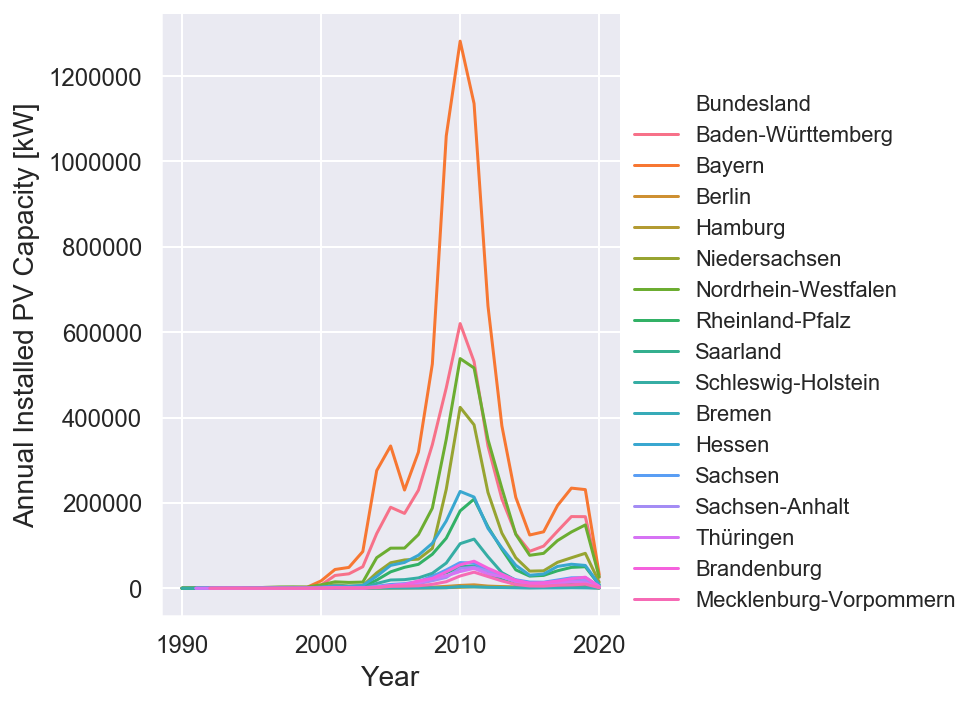

In [195]:
p1 = sns.relplot(x="Year", y="Installed_Cap", hue="Bundesland", kind="line", data = data)
p1.set(xlabel="Year",
       ylabel="Annual Installed PV Capacity [kW]",
       title= "")

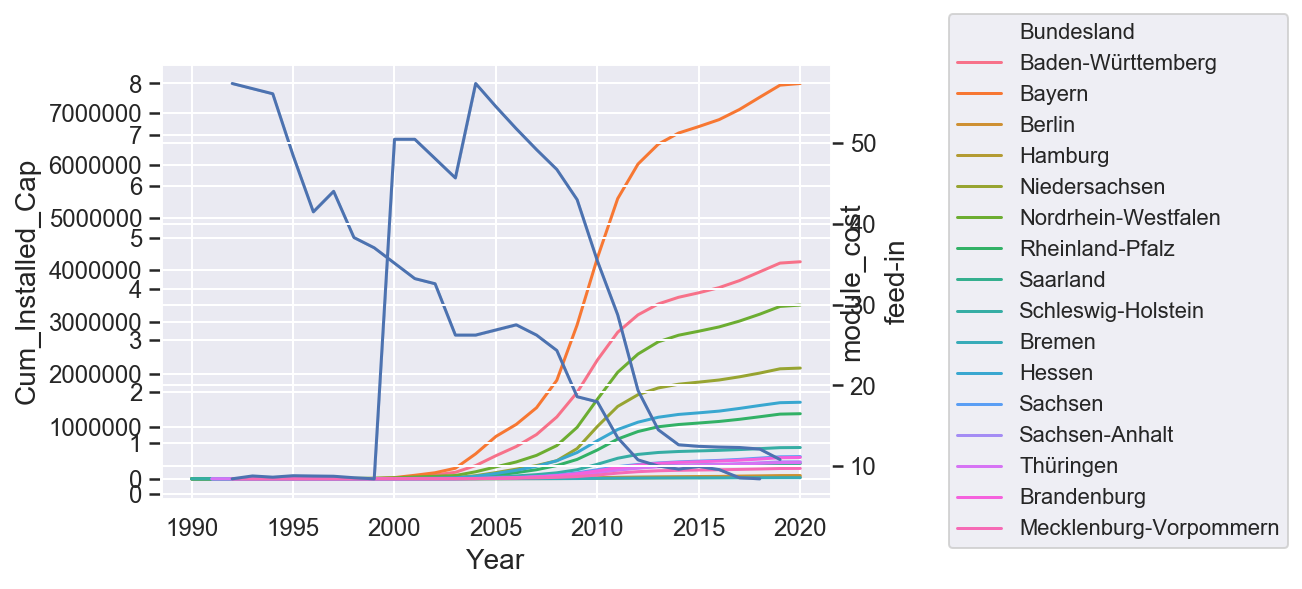

In [196]:
p2 = sns.lineplot(x = "Year", y="Cum_Installed_Cap", hue="Bundesland", data = data)
ax2 = plt.twinx()
ax3 = ax2.twinx()
sns.lineplot(x = "Year", y="module_cost", data = df1, ax = ax2)
sns.lineplot(x = "Year", y="feed-in", data = df1, ax = ax3) 
p2.legend(loc='center right', bbox_to_anchor=(1.7, 0.5), ncol=1)
plt.show()

### Split train test sets 
do a separate temporal split where the training set is the first 80% of days in the time series

In [197]:
df1 = data[(data.Year>=1992) & (data.Year<2020)]
df1.head()

Year         Bundesland  Installed_Cap  Cum_Installed_Cap  module_cost  \
23  1992  Baden-Württemberg        124.661            207.040          8.0   
24  1992             Bayern        157.574            378.679          8.0   
25  1992             Berlin        127.110            174.390          8.0   
26  1992        Brandenburg         37.880             37.880          8.0   
27  1992             Bremen         57.060             62.260          8.0   

    feed-in  population   area      GDP  Installed_Cap_pa  \
23   8.4303  10148708.0  35748  50969.0          0.003487   
24   8.4303  11770257.0  70542  17029.0          0.002234   
25   8.4303   3465748.0    891  75252.0          0.142660   
26   8.4303   2542651.0  29654  24556.0          0.001277   
27   8.4303    685845.0    419  19427.0          0.136181   

    Cum_Installed_Cap_pa  Installed_Cap_pc  Cum_Installed_Cap_pc  pop_density  \
23              0.005792          0.000012              0.000020   283.895826   
24              0.005368          0.000013              0.000032   166.854597   
25              0.195724          0.000037              0.000050  3889.728395   
26              0.001277          0.000015              0.000015    85.743947   
27              0.148592          0.000083              0.000091  1636.861575   

          GDP_pc  
23   5022.215636  
24   1446.782343  
25  21713.061654  
26   9657.636852  
27  28325.642091

In [198]:
df1.tail()

Year          Bundesland  Installed_Cap  Cum_Installed_Cap  module_cost  \
466  2019            Saarland       7878.804         293271.308         0.26   
467  2019             Sachsen      24904.416         421587.270         0.26   
468  2019      Sachsen-Anhalt      18854.647         323987.272         0.26   
469  2019  Schleswig-Holstein      18723.801         596546.907         0.26   
470  2019           Thüringen      12565.767         309550.871         0.26   

     feed-in  population   area       GDP  Installed_Cap_pa  \
466  10.8175    986887.0   2571   36253.0          3.064490   
467  10.8175   4071971.0  18450  128097.0          1.349833   
468  10.8175   2194782.0  20454   63545.0          0.921807   
469  10.8175   2903773.0  15804   97762.0          1.184751   
470  10.8175   2133378.0  16202   63866.0          0.775569   

     Cum_Installed_Cap_pa  Installed_Cap_pc  Cum_Installed_Cap_pc  \
466            114.068965          0.007983              0.297168   
467             22.850259          0.006116              0.103534   
468             15.839800          0.008591              0.147617   
469             37.746577          0.006448              0.205439   
470             19.105720          0.005890              0.145099   

     pop_density        GDP_pc  
466   383.853364  36734.702149  
467   220.703035  31458.229933  
468   107.303315  28952.761595  
469   183.736586  33667.232253  
470   131.673744  29936.560703

In [199]:
len(df1.Cum_Installed_Cap)

448

In [200]:
bundeslaender = df1['Bundesland'].unique()
bundeslaender

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [201]:
bundeslaender_id = df1['area'].unique()
bundeslaender_id

array([35748, 70542,   891, 29654,   419,   755, 21116, 23295, 47710,
       34112, 19858,  2571, 18450, 20454, 15804, 16202], dtype=int64)

In [202]:
years = df1['Year'].unique()
years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019], dtype=int64)

In [203]:
# from datafram to array (w/d "Date" column)
X_full = df1[['Year','module_cost','feed-in','area','pop_density','GDP_pc']].to_numpy()
X_full.shape

(448, 6)

In [204]:
# from datafram to array
Y_full = df1['Installed_Cap'].to_numpy()
Y_full.shape

(448,)

In [205]:
X_df=pd.DataFrame(X_full, columns=['Year','module_cost','feed-in','area','pop_density','GDP_pc'])
X_df.head()

Year  module_cost  feed-in     area  pop_density        GDP_pc
0  1992.0          8.0   8.4303  35748.0   283.895826   5022.215636
1  1992.0          8.0   8.4303  70542.0   166.854597   1446.782343
2  1992.0          8.0   8.4303    891.0  3889.728395  21713.061654
3  1992.0          8.0   8.4303  29654.0    85.743947   9657.636852
4  1992.0          8.0   8.4303    419.0  1636.861575  28325.642091

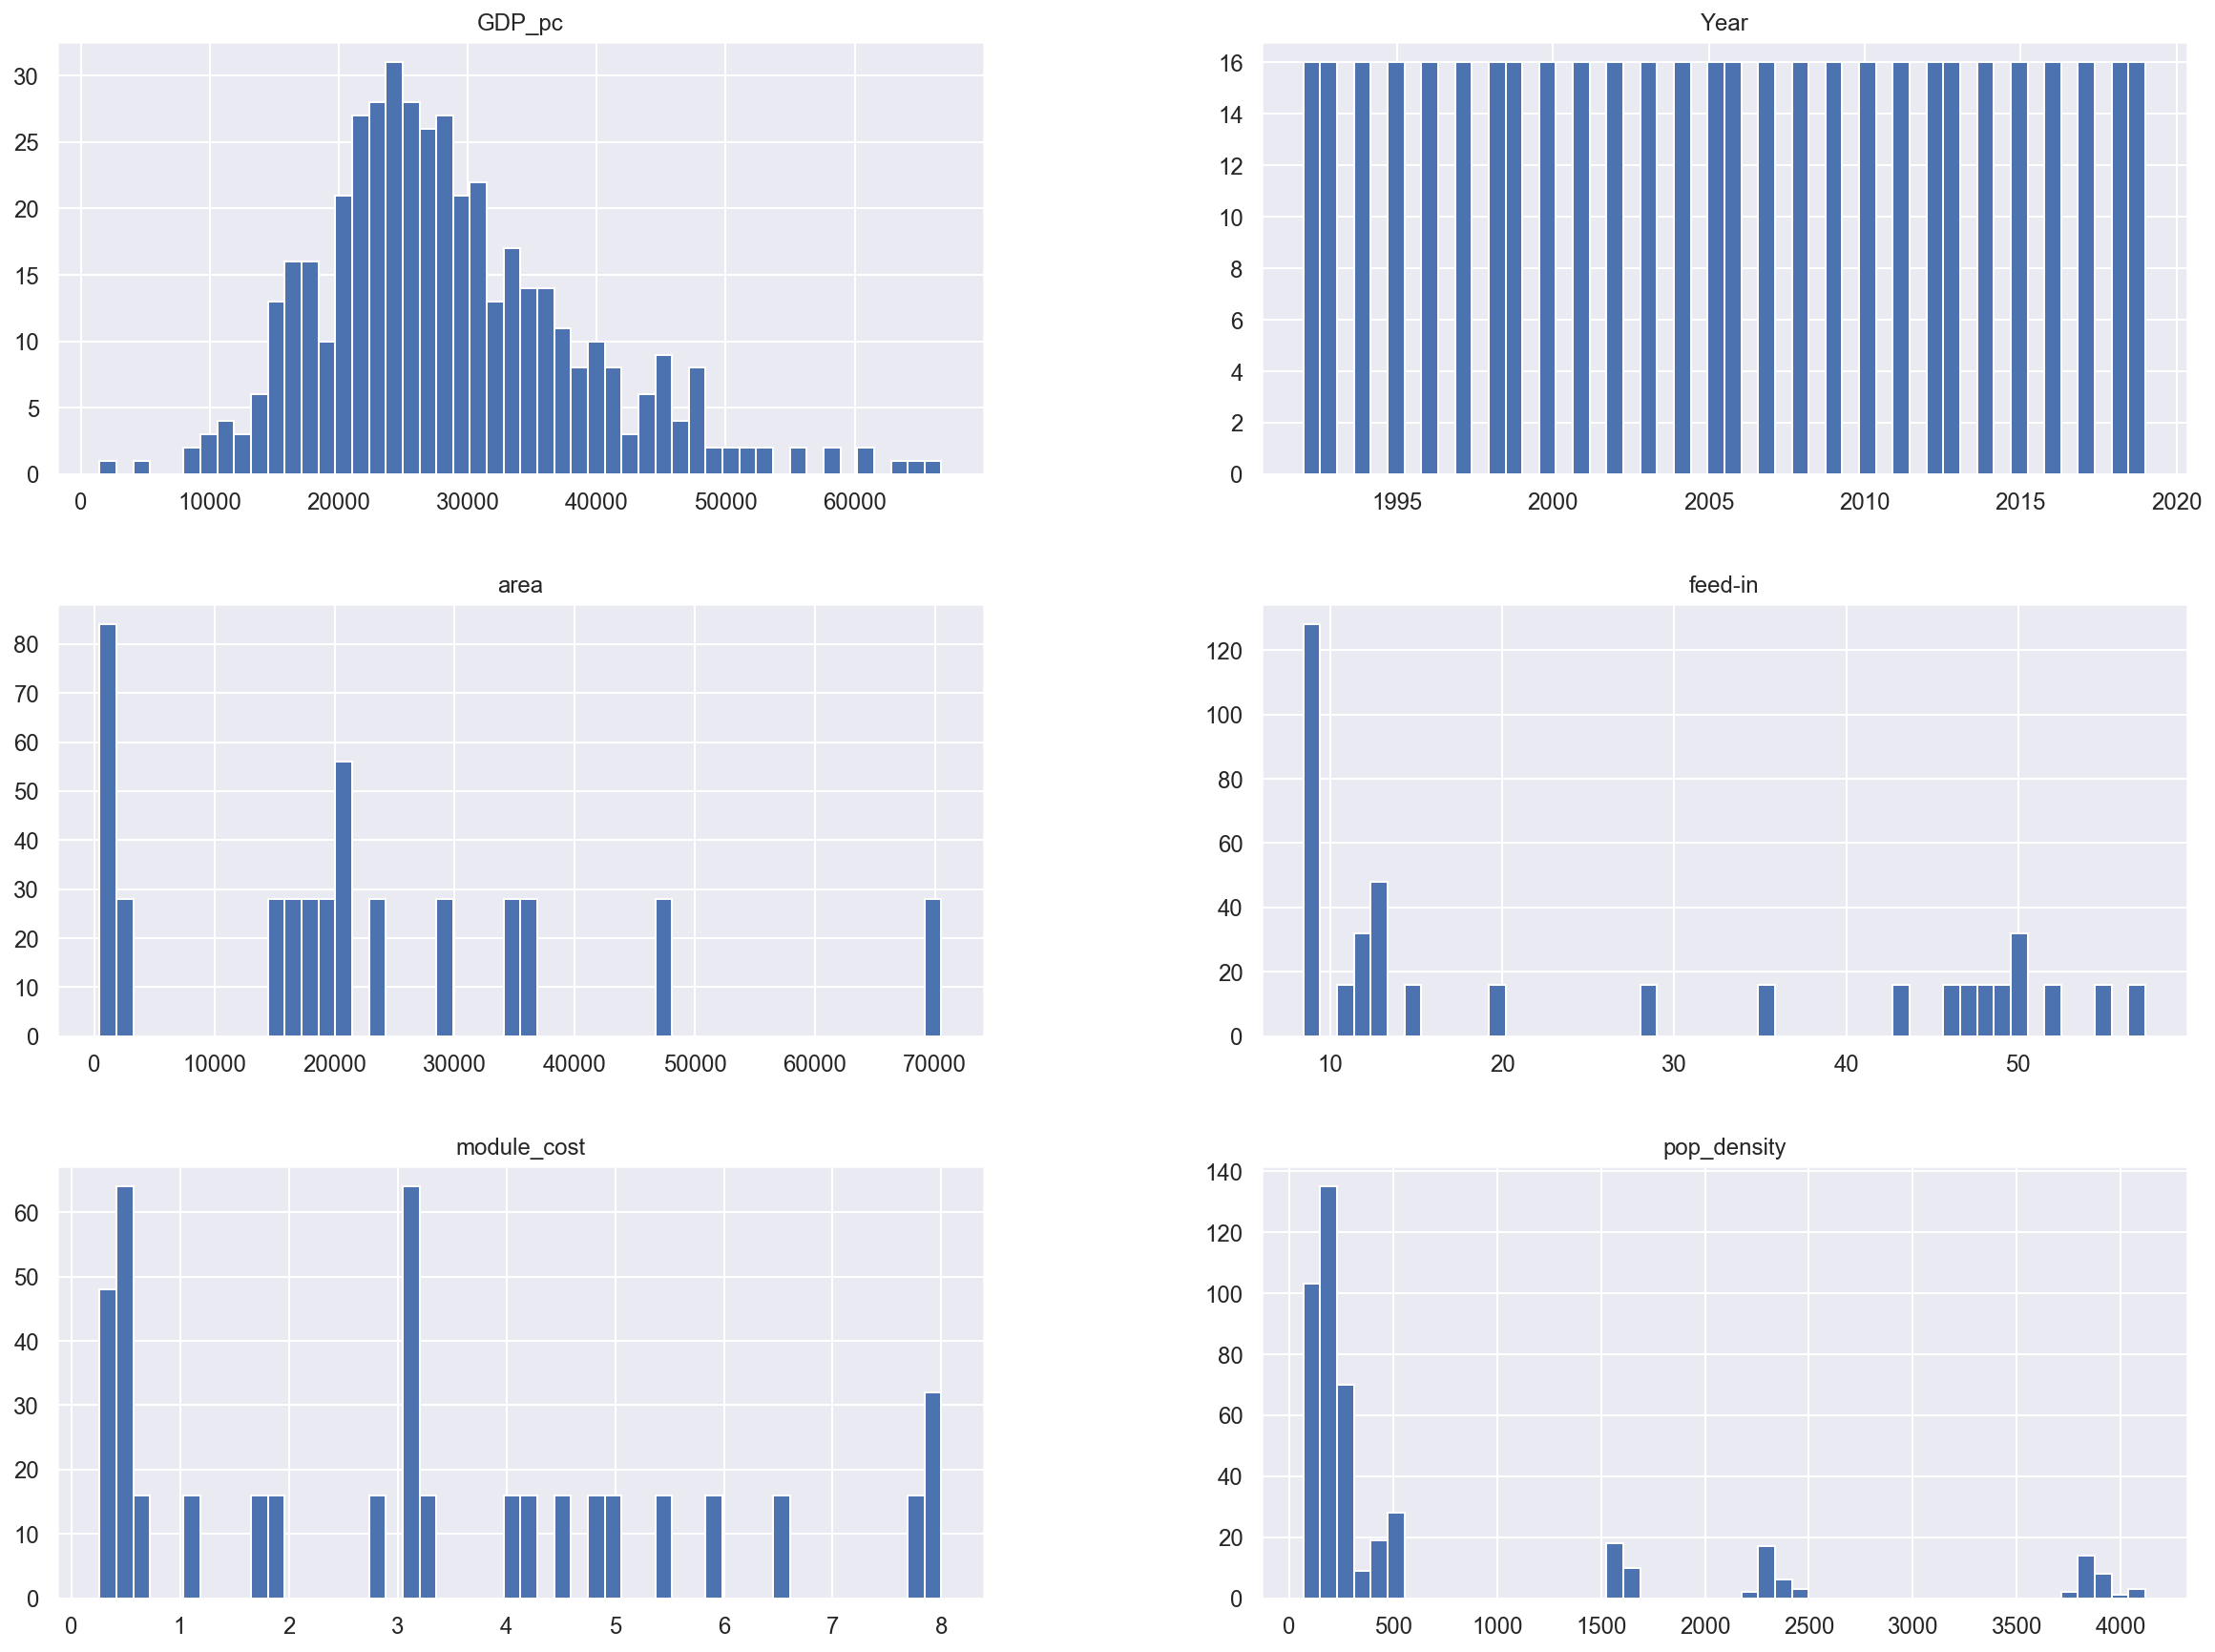

In [206]:
X_df.hist(bins=50, figsize=(20,15))
plt.show()

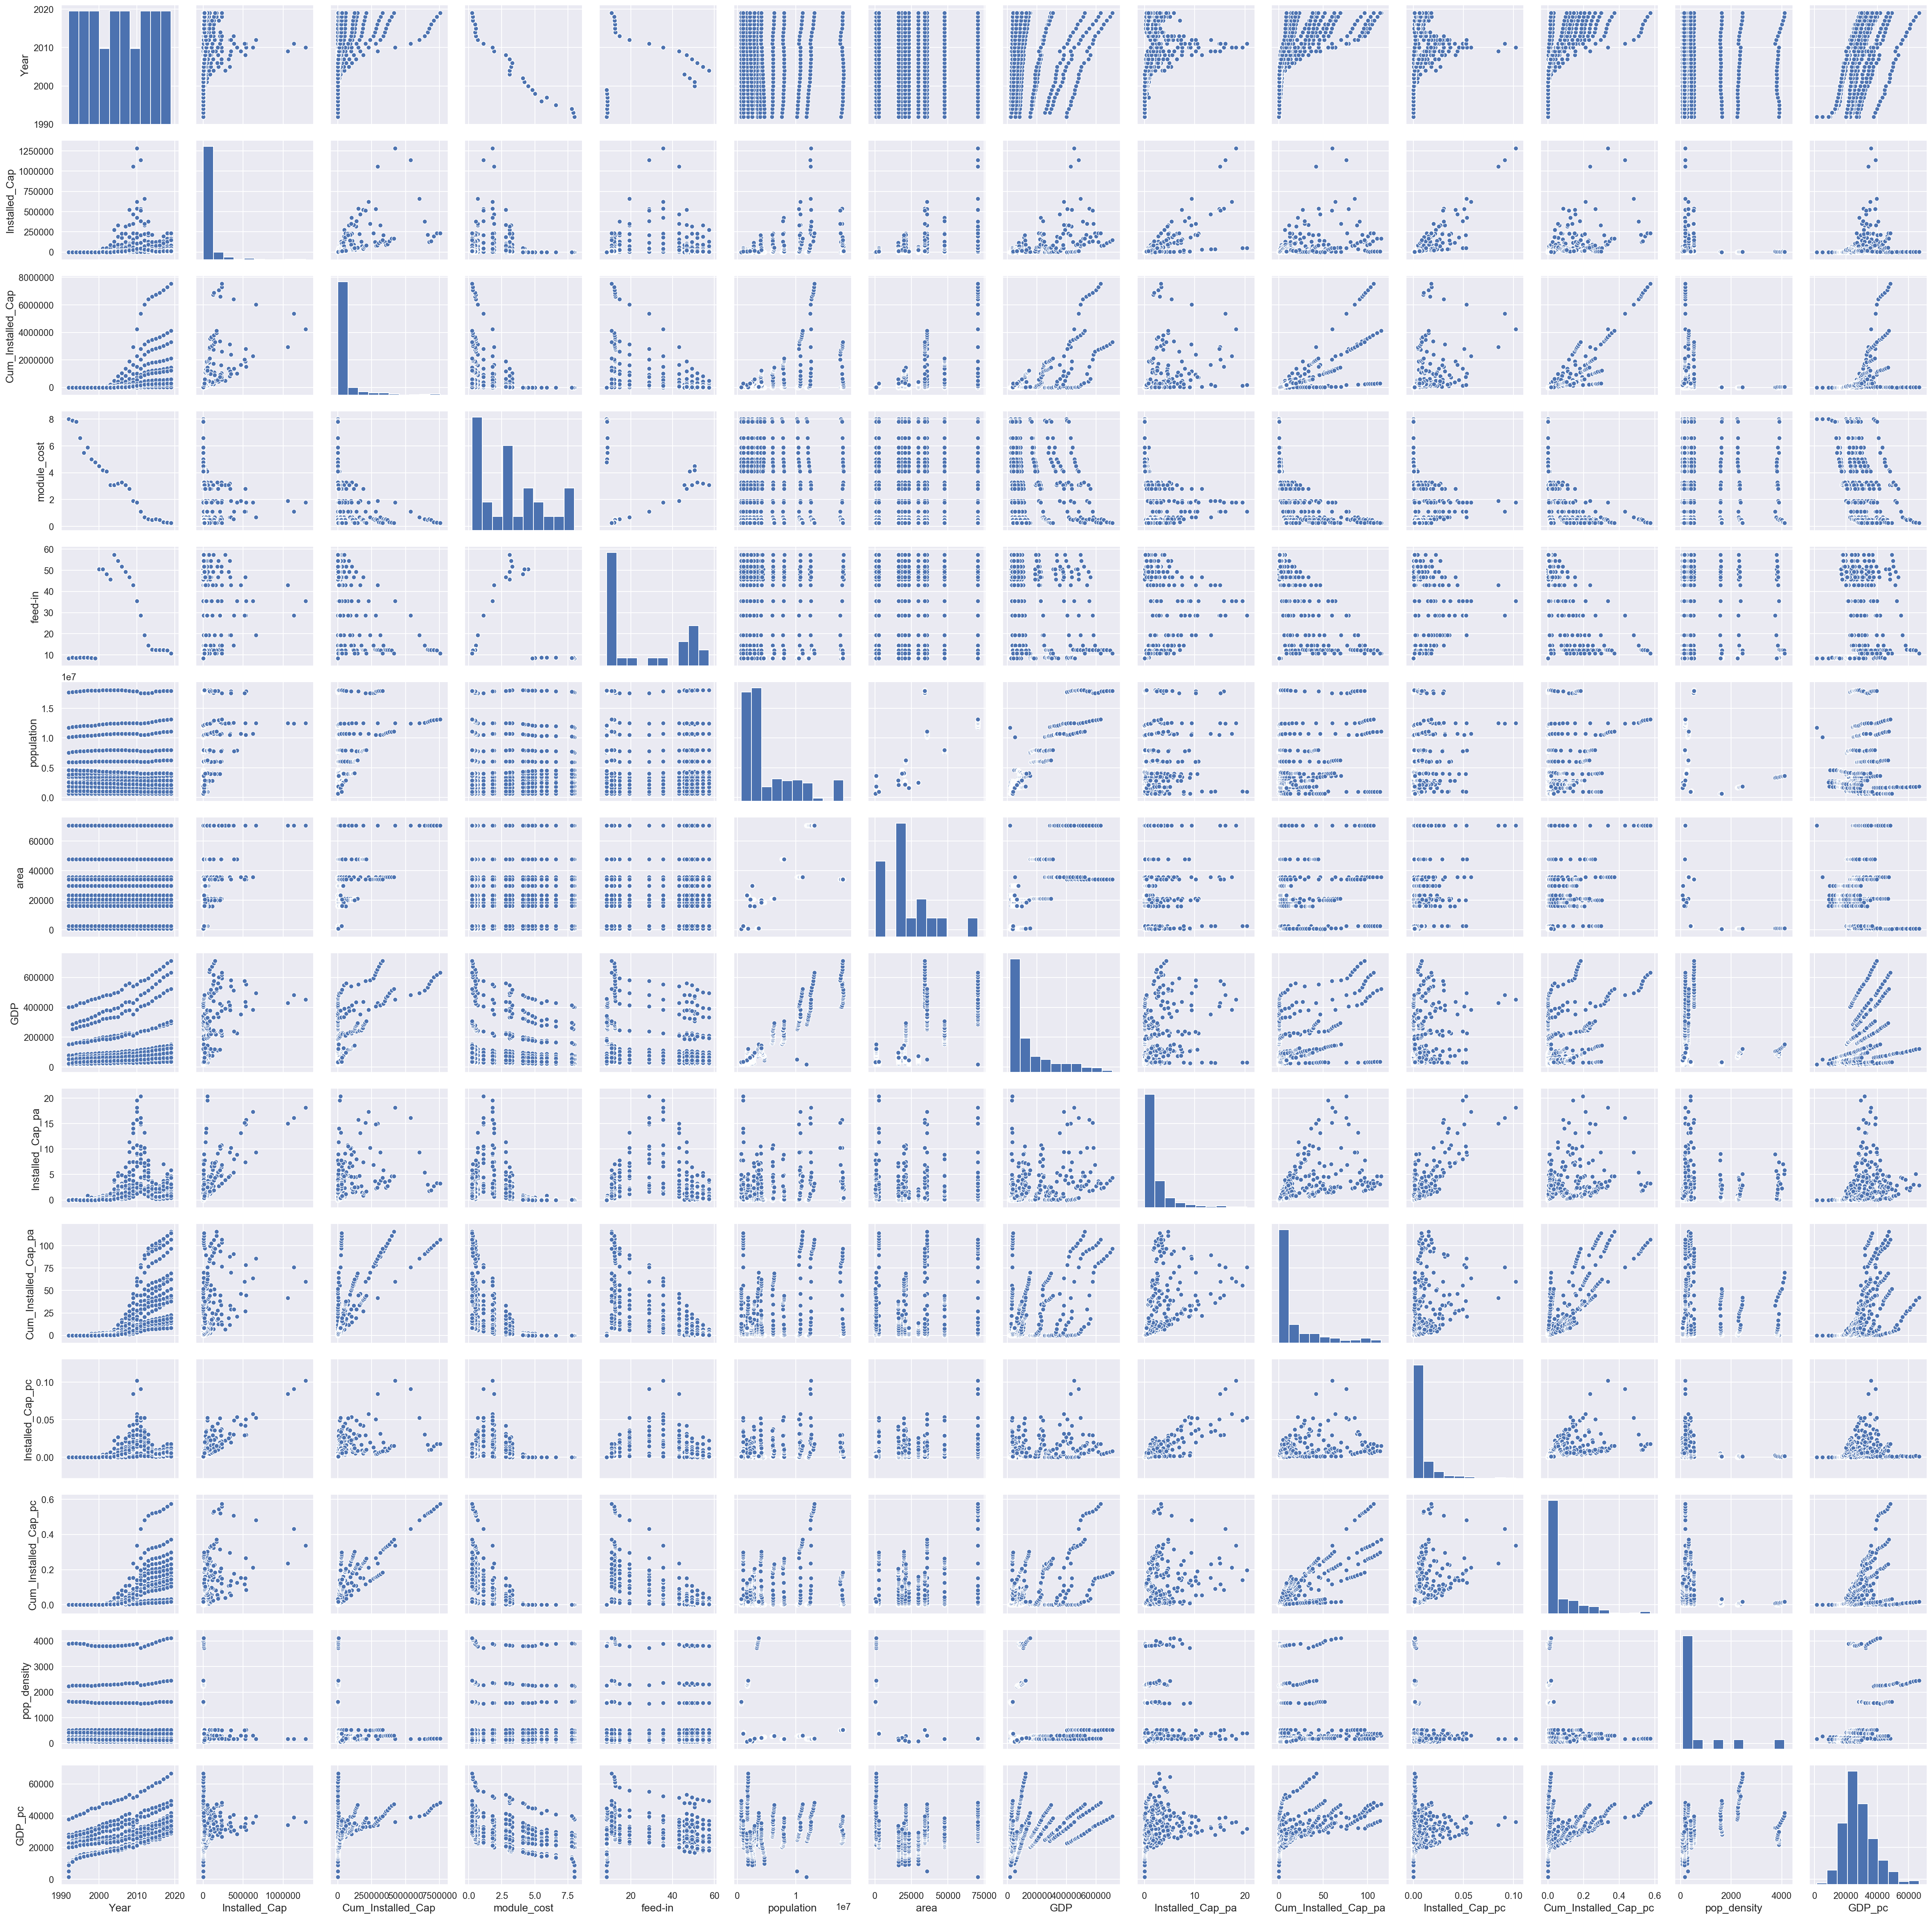

In [207]:
#sns.pairplot(df1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B72ED3FDC8>,
      dtype=object)

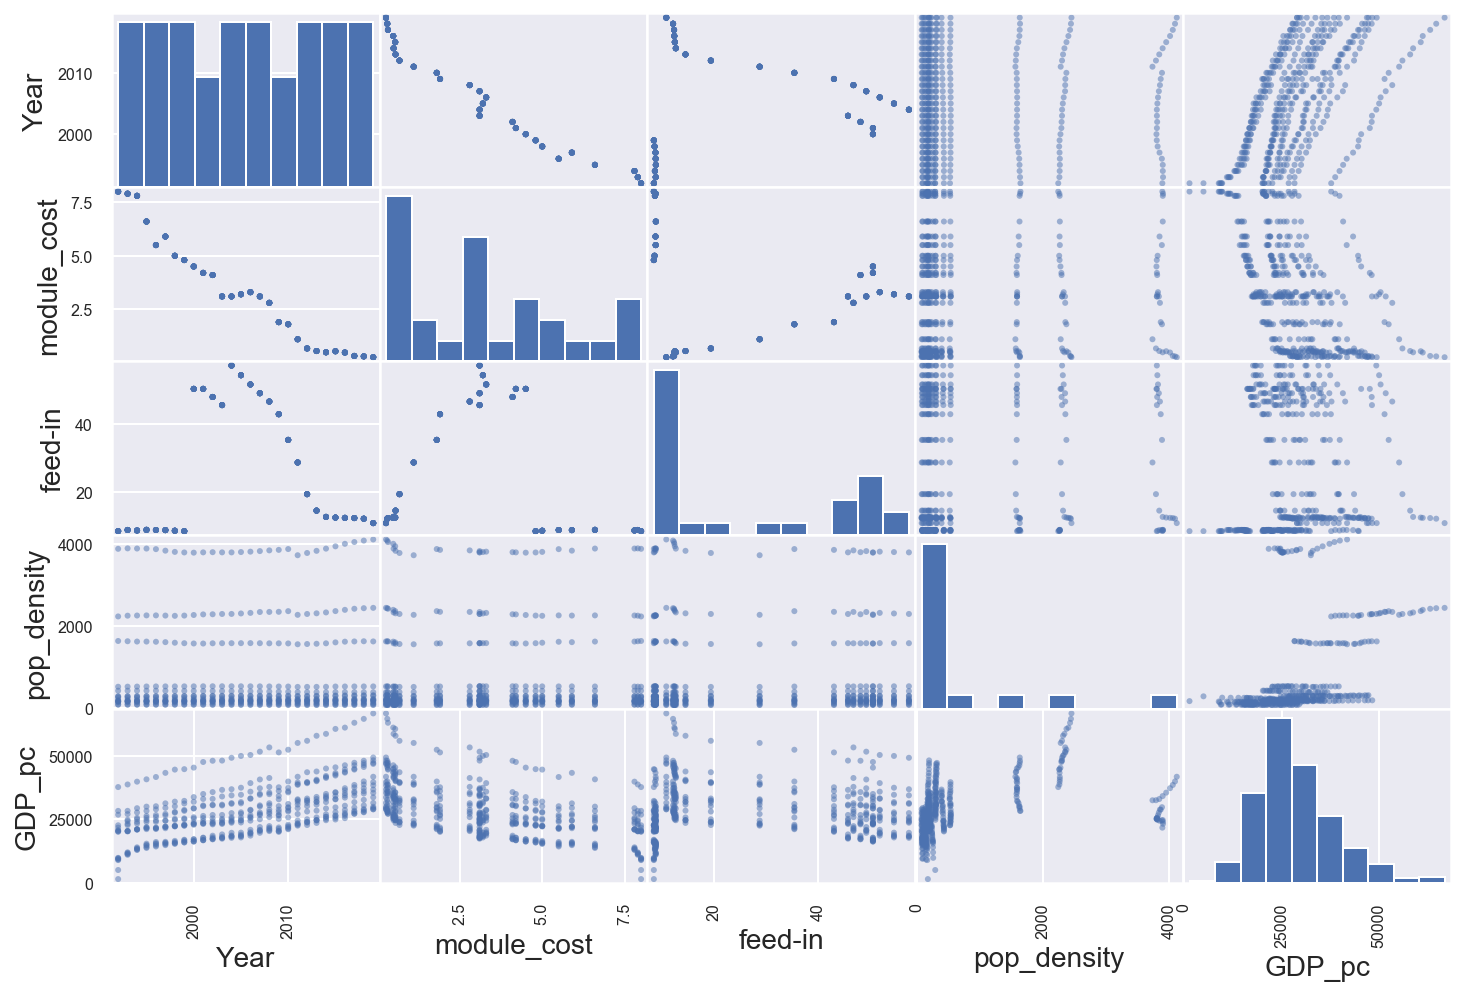

In [208]:
# correlation plots
from pandas.plotting import scatter_matrix
scatter_matrix(X_df[['Year','module_cost','feed-in','pop_density','GDP_pc']], figsize=(12, 8))

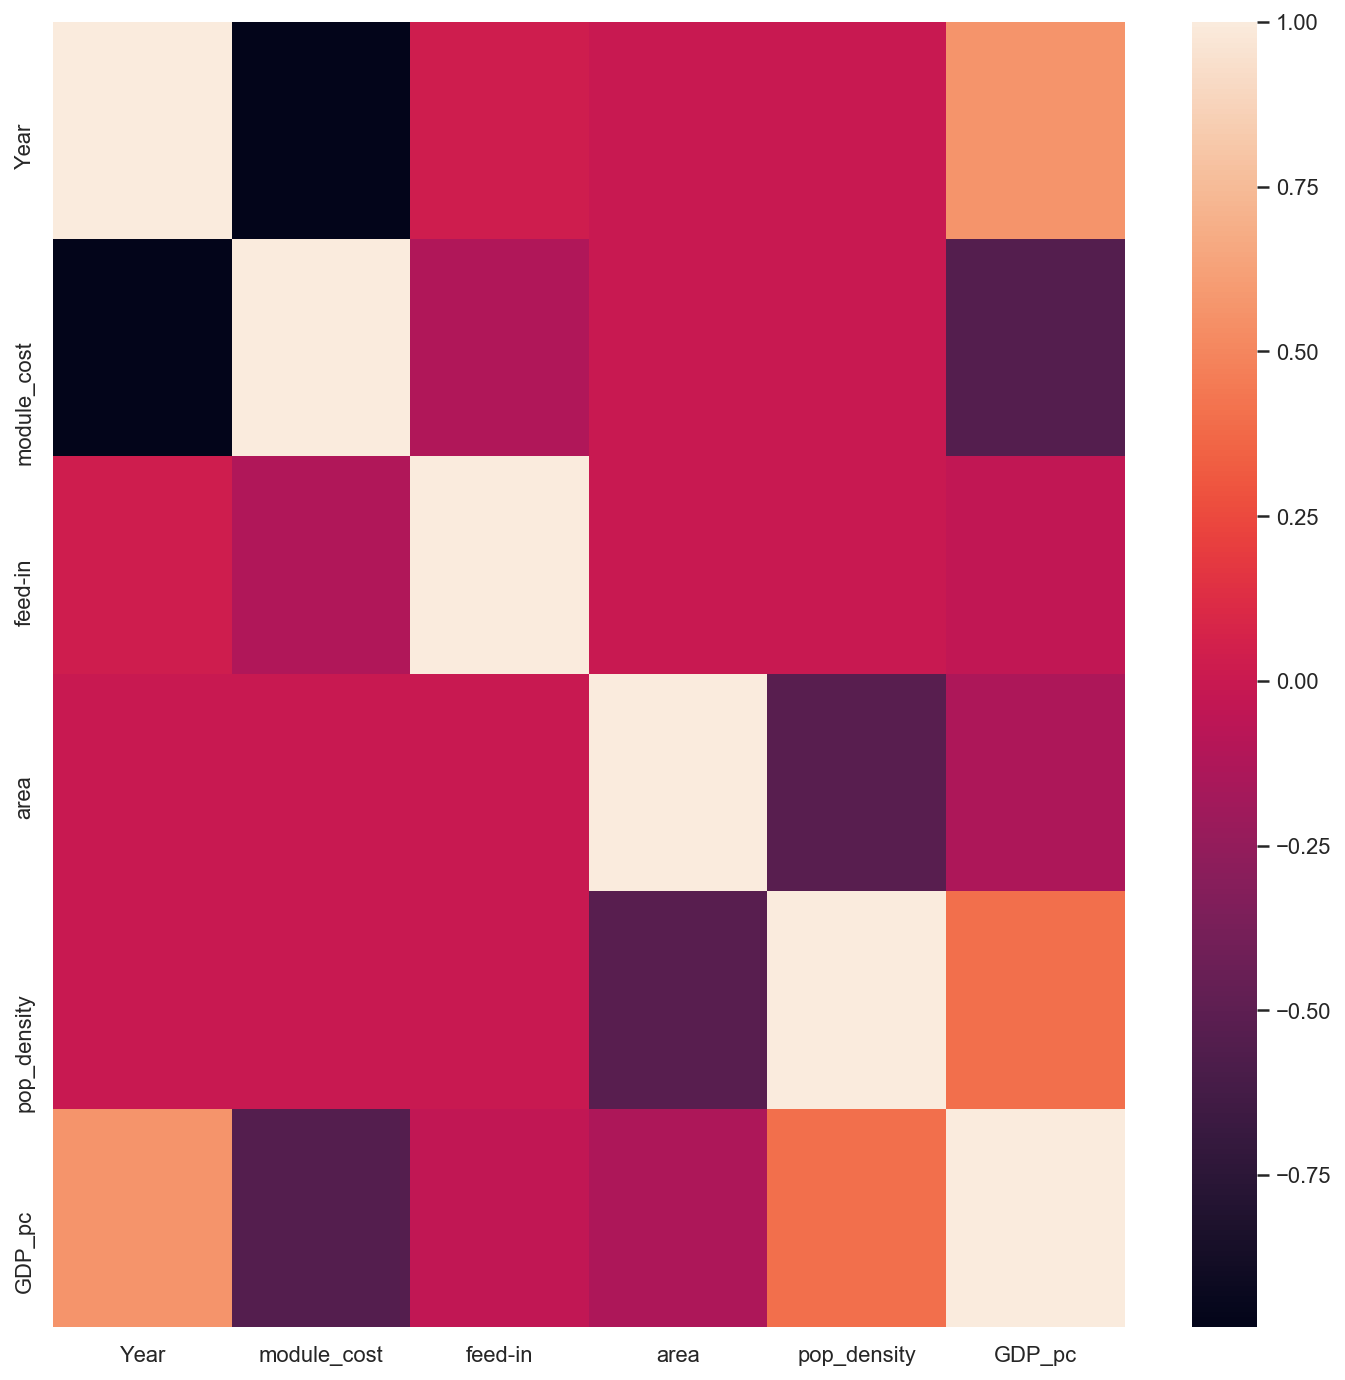

In [209]:
sns.set(rc={'figure.figsize':(12,12)})
correlation_matrix = X_df.corr().round(2)
sns.heatmap(correlation_matrix) #annot=True
plt.show()

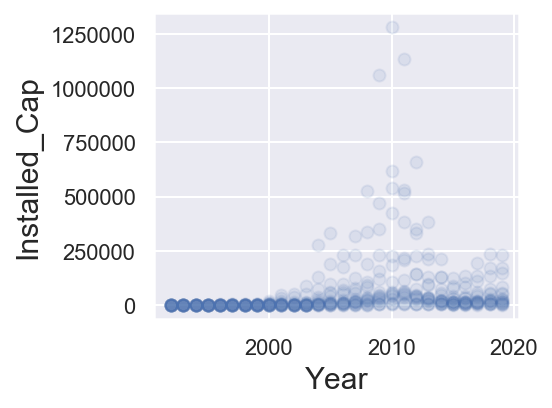

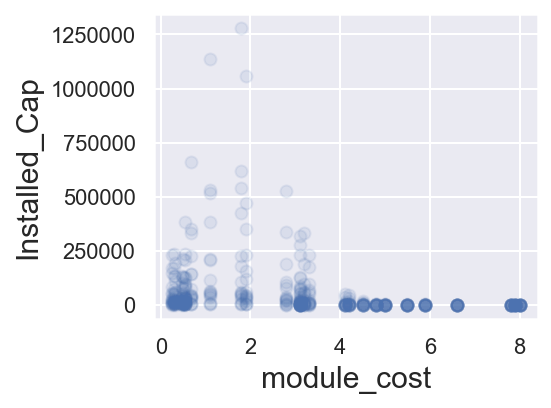

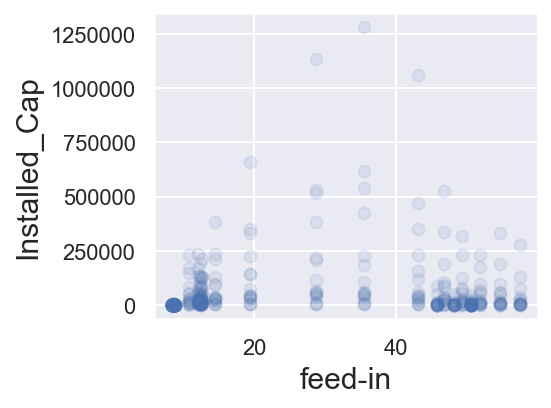

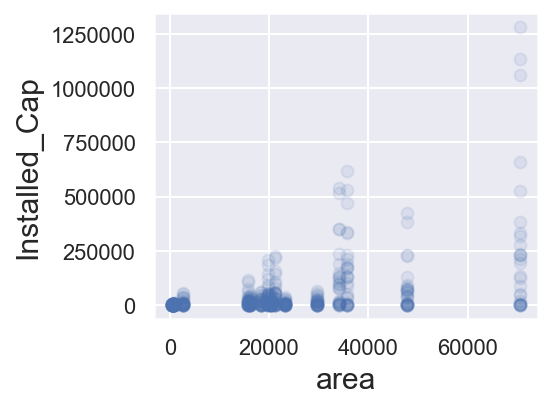

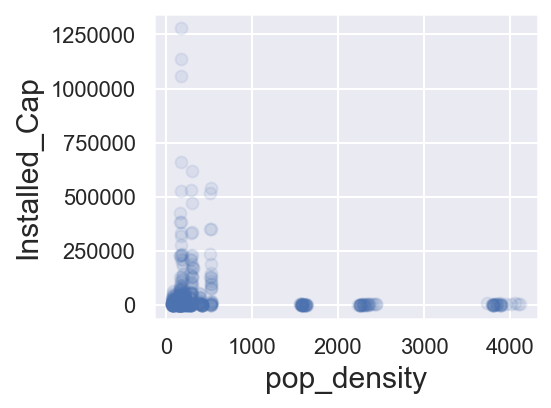

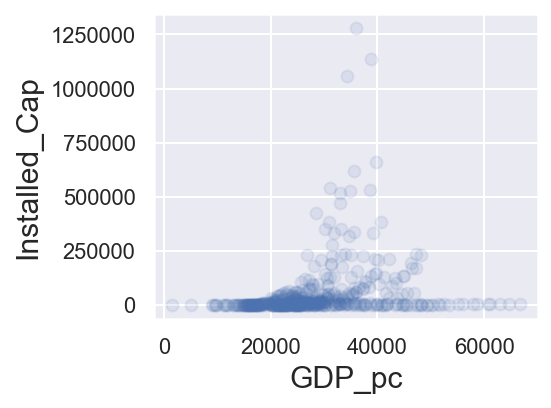

In [210]:
# scatter plot relative to the target (stock price)
for feature_name in X_df.columns:
    plt.figure(figsize=(4, 3))
    plt.scatter(df1[feature_name], Y_full, alpha=0.1)
    plt.ylabel('Installed_Cap', size=15)
    plt.xlabel(feature_name, size=15)
    plt.tight_layout()

# ML CODE

In [211]:
bundeslaender.shape

(16,)

In [212]:
X_full.shape

(448, 6)

In [213]:
Y_full.shape

(448,)

In [214]:
X_df.head()

Year  module_cost  feed-in     area  pop_density        GDP_pc
0  1992.0          8.0   8.4303  35748.0   283.895826   5022.215636
1  1992.0          8.0   8.4303  70542.0   166.854597   1446.782343
2  1992.0          8.0   8.4303    891.0  3889.728395  21713.061654
3  1992.0          8.0   8.4303  29654.0    85.743947   9657.636852
4  1992.0          8.0   8.4303    419.0  1636.861575  28325.642091

In [215]:
X_df.dtypes

Year           float64
module_cost    float64
feed-in        float64
area           float64
pop_density    float64
GDP_pc         float64
dtype: object

In [217]:
X_df['Year'] = pd.to_datetime(X_df['Year'], format='%Y').dt.year
X_df.dtypes

Year             int64
module_cost    float64
feed-in        float64
area           float64
pop_density    float64
GDP_pc         float64
dtype: object

In [ ]:
print(X_df)

In [226]:
X_df.dtypes

Year             int64
module_cost    float64
feed-in        float64
area           float64
pop_density    float64
GDP_pc         float64
dtype: object

In [227]:
X_df.head()

Year  module_cost  feed-in     area  pop_density        GDP_pc
0  1992          8.0   8.4303  35748.0   283.895826   5022.215636
1  1992          8.0   8.4303  70542.0   166.854597   1446.782343
2  1992          8.0   8.4303    891.0  3889.728395  21713.061654
3  1992          8.0   8.4303  29654.0    85.743947   9657.636852
4  1992          8.0   8.4303    419.0  1636.861575  28325.642091

### Data Split
data from years 1992 - 2019 (28 years)

train 75% or 21 years: from 1992 - 2012

test 25% or 7 years: from 2013 - 2019

In [228]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_full, Y_full, test_size=0.25, stratify = X_df.area)

In [229]:
print("train data", X_train.shape, Y_train.shape)
print("test data", X_test.shape,  Y_test.shape)

train data (336, 6) (336,)
test data (112, 6) (112,)


In [230]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [231]:
# randomized splitting
# use non-standardized data for randomized splitting:
lin_reg.fit(X_train, Y_train)
print("R-squared for training dataset:{}".
      format(np.round(lin_reg.score(X_train, Y_train), 2)))

R-squared for training dataset:0.35


In [232]:
features = list(X_df.columns)

print('The coefficients of the features from the linear model:')
print(dict(zip(features, [round(x, 2) for x in lin_reg.coef_])))

The coefficients of the features from the linear model:
{'Year': -1719.83, 'module_cost': -12155.14, 'feed-in': 683.06, 'area': 4.37, 'pop_density': 10.3, 'GDP_pc': 2.62}


In [234]:
from sklearn.metrics import mean_squared_error
# randomized splitting
# in-sample performance (train data)
Y_train_pred = lin_reg.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)
print("RMS: %s" % train_rmse) # = np.sqrt(np.mean((predicted - expected) ** 2))

RMS: 115241.55393038802


In [235]:
# randomized splitting
# out-of-sample performance (test data)
Y_test_pred = lin_reg.predict(X_test)        
test_mse = mean_squared_error(Y_test, Y_test_pred)
test_rmse = np.sqrt(test_mse)
print("RMS: %s" % test_rmse) 

RMS: 85333.11778720327


#### Explained variance and $r^2$-score:

In [239]:
from sklearn.metrics import r2_score
# randomized splitting
r2 = round(r2_score(Y_test, Y_test_pred), 2)
print("R2: %s" % r2)

R2: 0.04


In [240]:
from sklearn.metrics import explained_variance_score
exp_var = round(explained_variance_score(Y_test,Y_test_pred),2)
print("Explained variance: %s" % exp_var)

Explained variance: 0.07


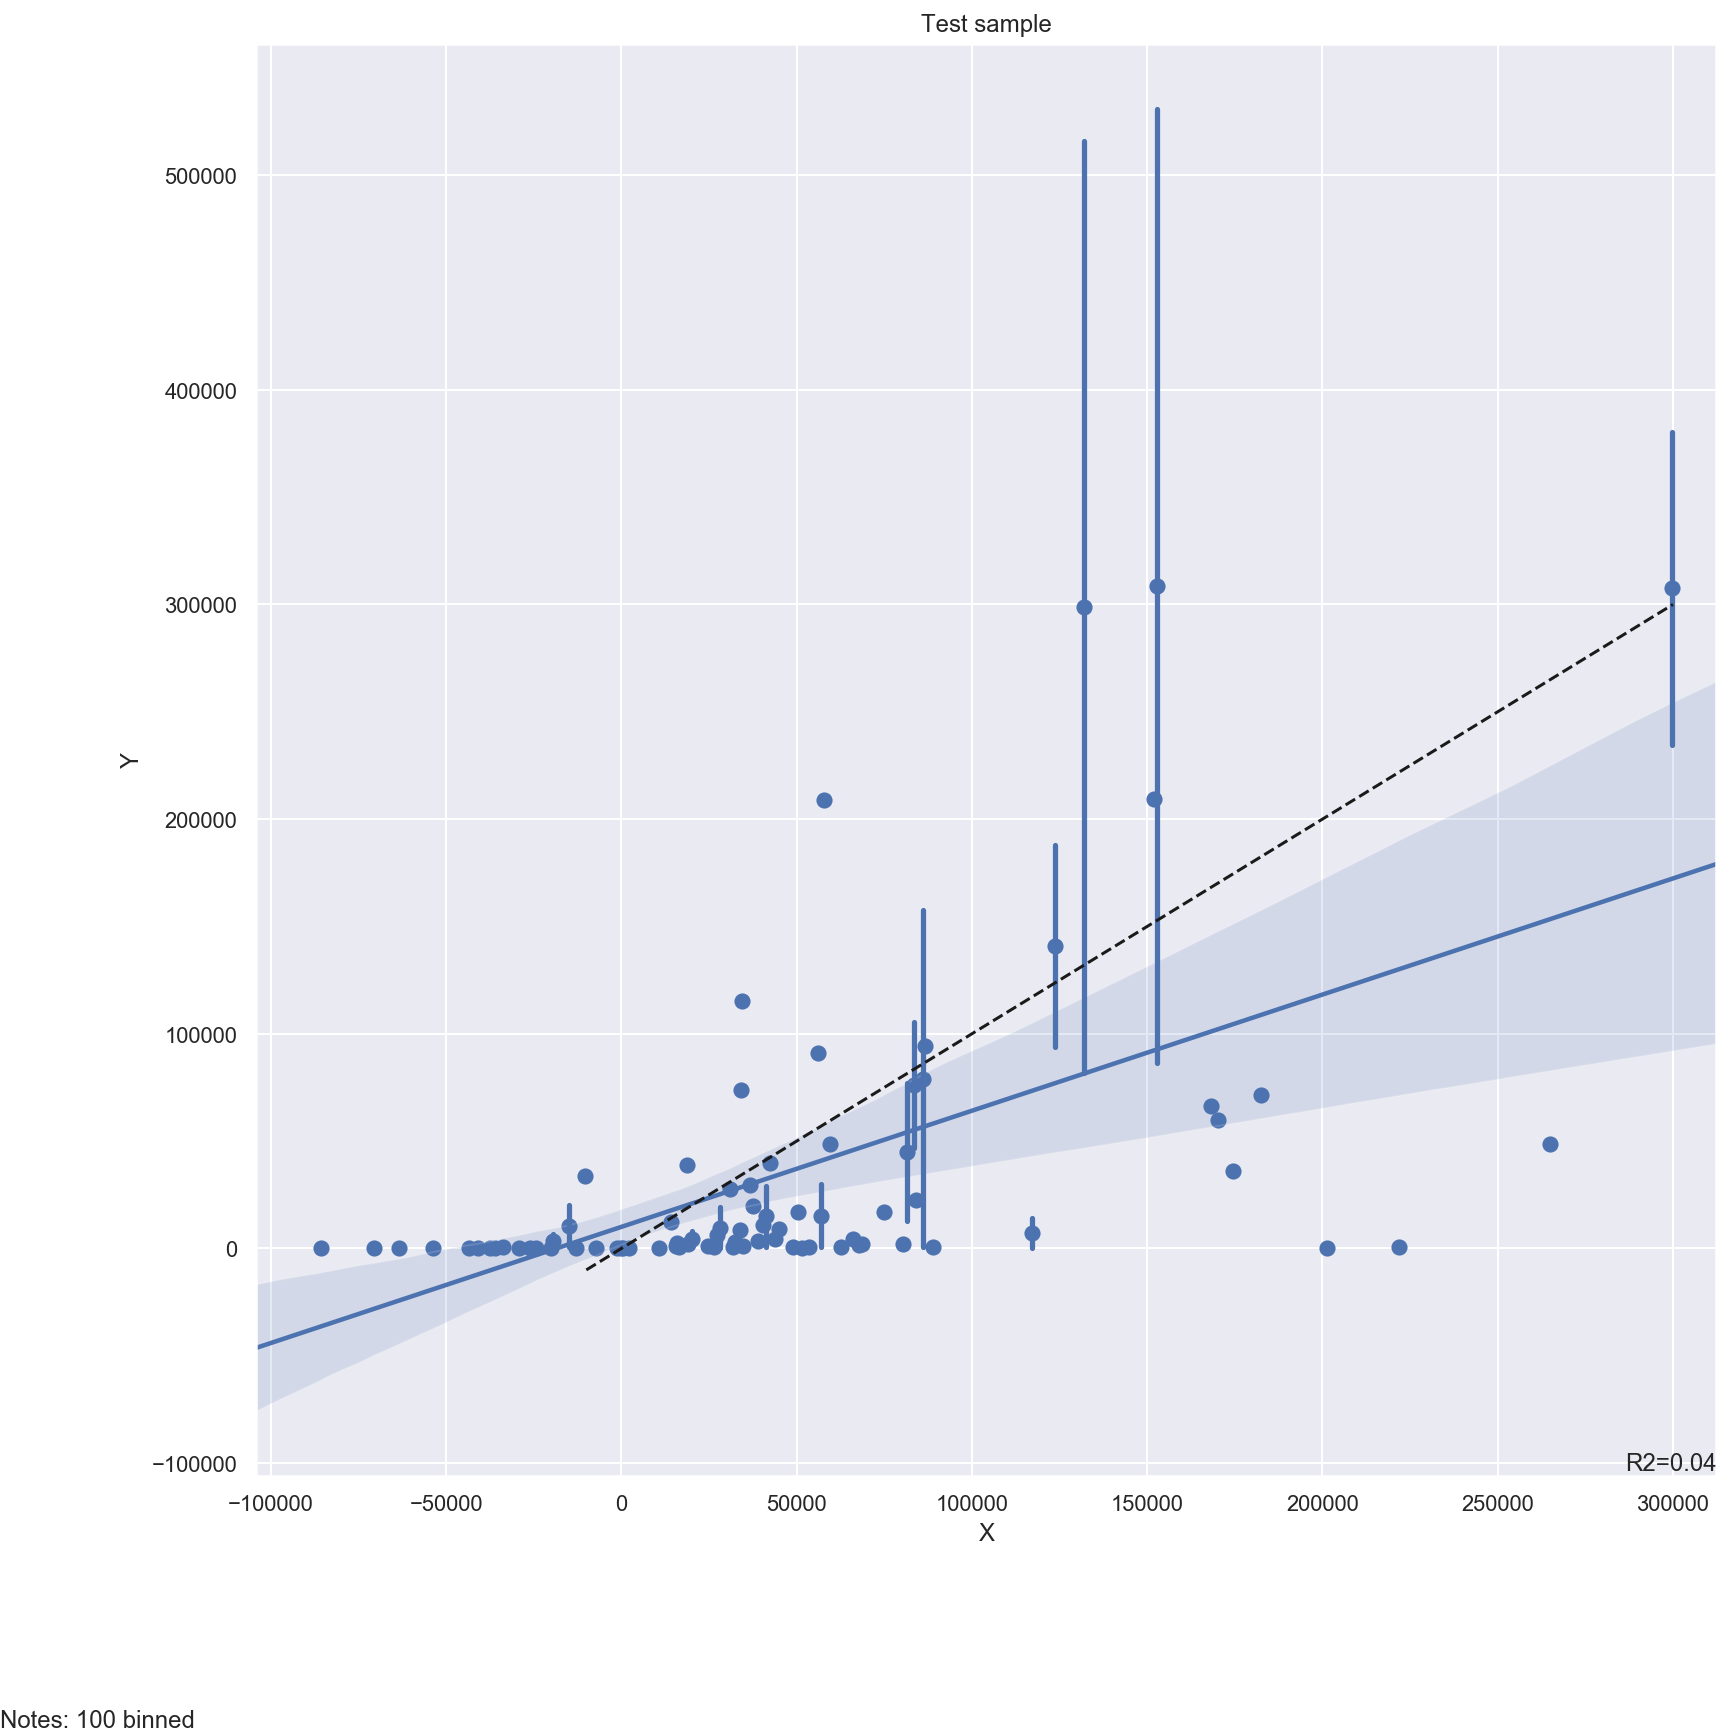

In [243]:
# Regplot
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("X")
plt.ylabel("Y")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([-10000, 300000], [-10000, 300000], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

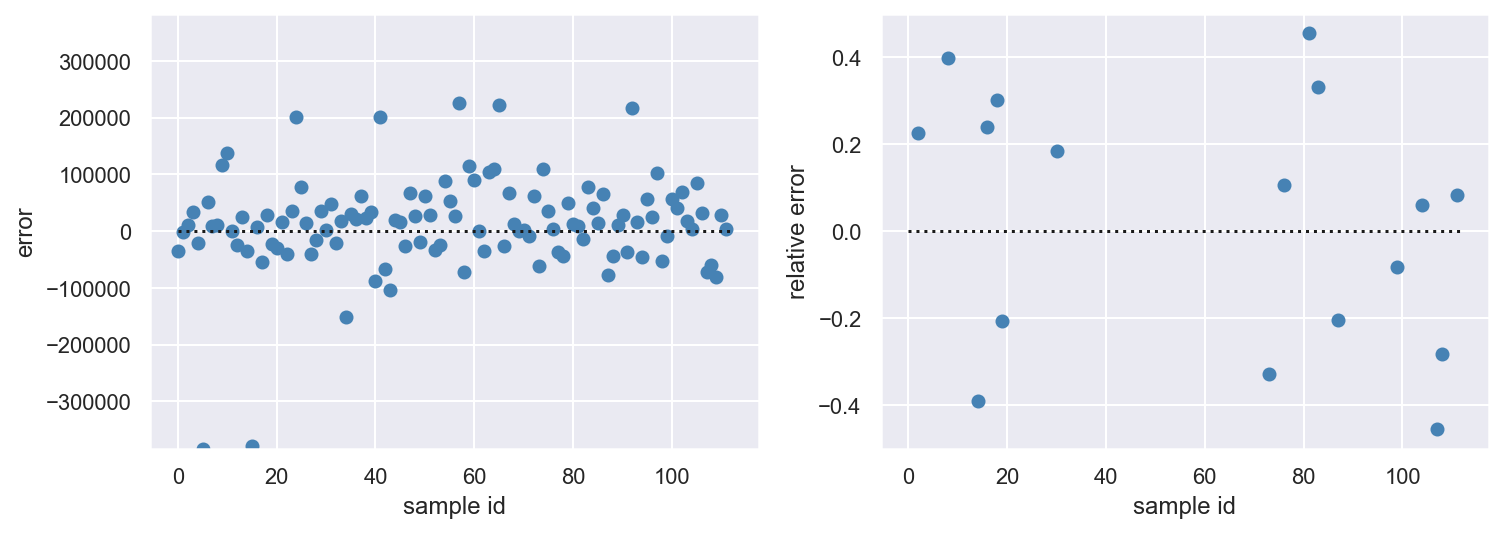

In [244]:
#Let us plot how good given and predicted values match on the training data set
def plot_fit_quality(values_test, predicted):
    
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)

    x = np.arange(len(predicted))
    plt.scatter(x, predicted - values_test, color='steelblue', marker='o') 

    plt.plot([0, len(predicted)], [0, 0], "k:")
    
    max_diff = np.max(np.abs(predicted - values_test))
    plt.ylim([-max_diff, max_diff])
    
    plt.ylabel("error")
    plt.xlabel("sample id")

    plt.subplot(1, 2, 2)

    plt.scatter(x, (predicted - values_test) / values_test, color='steelblue', marker='o') 
    plt.plot([0, len(predicted)], [0, 0], "k:")
    plt.ylim([-.5, .5])
      
    plt.ylabel("relative error")
    plt.xlabel("sample id")

plot_fit_quality(Y_test, Y_test_pred)

## Polynomial Regression

In [245]:
from sklearn.preprocessing import PolynomialFeatures
poly_features=PolynomialFeatures(degree=2)

In [248]:
# randomized splitting
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, Y_train)

y_train_pred = lin_reg.predict(X_train_poly)
y_test_pred = lin_reg.predict(X_test_poly)

train_mse = mean_squared_error(Y_train, Y_train_pred)
train_rmse = np.sqrt(train_mse)

test_mse = mean_squared_error(Y_test,Y_test_pred)
test_rmse = np.sqrt(test_mse)

print("train RMS: %s" % train_rmse) 
print("test RMS: %s" % test_rmse) 
print("train R2: %s" % round(r2_score(Y_train, Y_train_pred), 2)) 
print("test R2: %s" % round(r2_score(Y_test, Y_test_pred), 2))

train RMS: 115241.55393038802
test RMS: 85333.11778720327
train R2: 0.35
test R2: 0.04


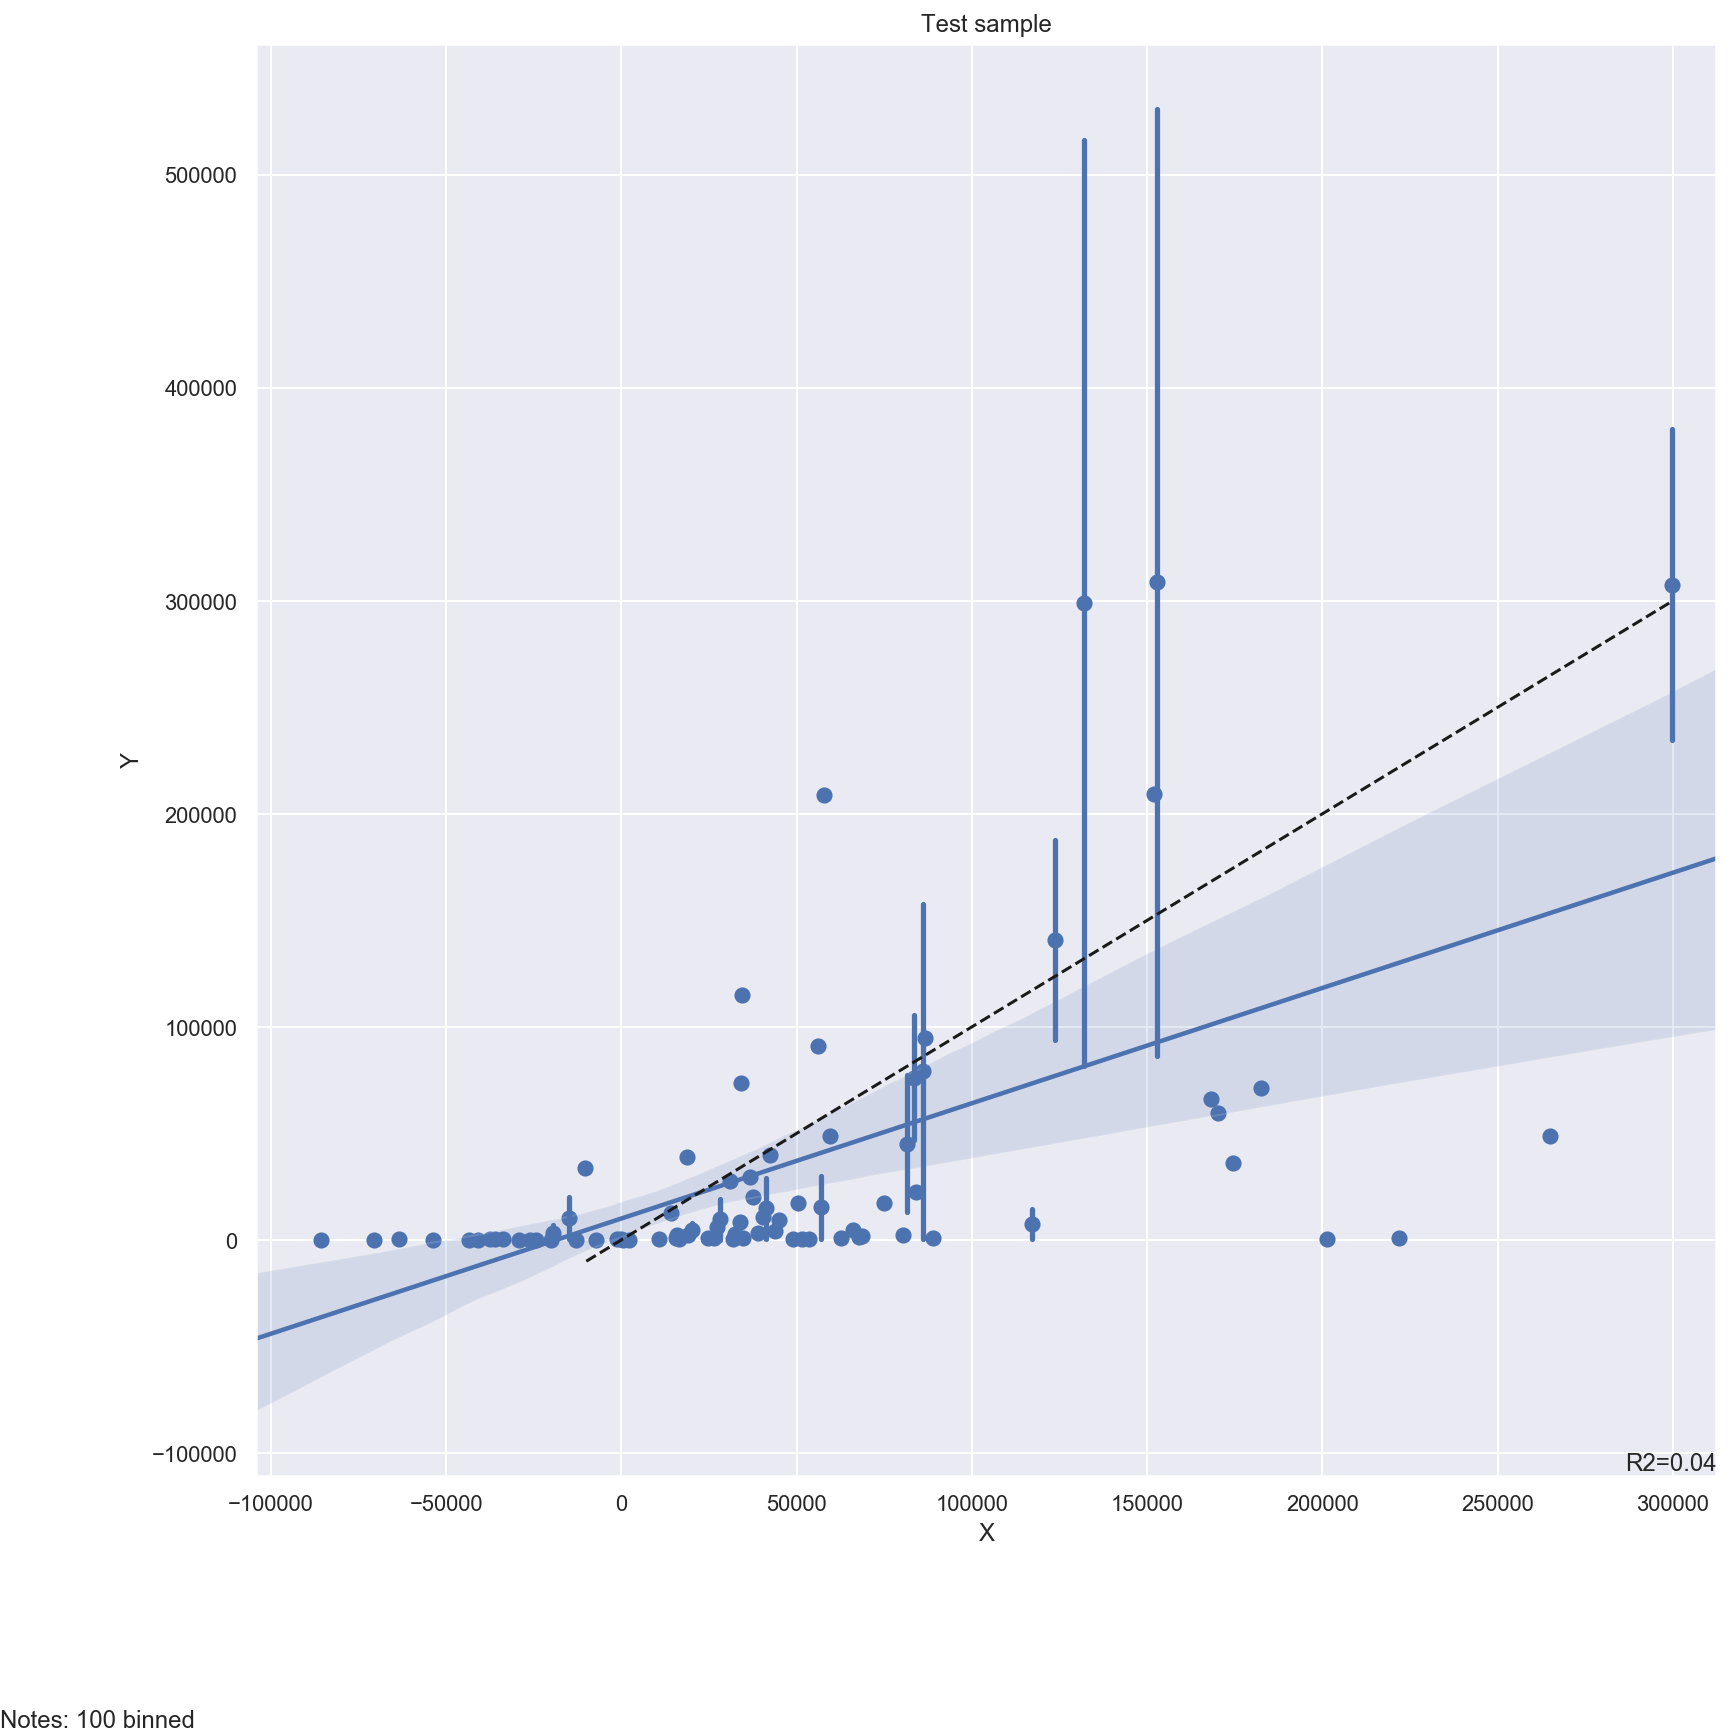

In [250]:
# randomized splitting
r2 = r2=round(r2_score(Y_test, Y_test_pred), 2)

# Regplot
g=sns.regplot(x= Y_test_pred, y=Y_test, x_bins = 100)
g=g.set_title("Test sample")
plt.xlabel("X")
plt.ylabel("Y")
plt.annotate('R2={}'.format(r2),
            xy=(1, 0),  xycoords='axes fraction',
            horizontalalignment='right',
            verticalalignment='bottom')
plt.annotate('Notes: 100 binned',
            xy=(0, 0),  xycoords='figure fraction',
            horizontalalignment='left',
            verticalalignment='bottom')
plt.plot([-10000, 300000], [-10000, 300000], '--k')
plt.axis('tight')
plt.tight_layout()
plt.show(g)

In [23]:
smp_size = floor(0.80 * length (unique (df1$Jahr)))
iris %>% filter(Species %in% sample(levels(Species),smp_size))

SyntaxError: invalid syntax (<ipython-input-23-80f41b133f65>, line 1)

In [24]:
X = df1["Jahr"]
Y = df1["cum_installed_cap"]

In [25]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit()
print(tscv)
TimeSeriesSplit(max_train_size=None, n_splits=5)
for train_index, test_index in tscv.split(X):
...     print("TRAIN:", train_index, "TEST:", test_index)
...     X_train, X_test = X[train_index], X[test_index]
...     y_train, y_test = y[train_index], y[test_index]

IndentationError: expected an indented block (<ipython-input-25-0f87cbc375a5>, line 6)

In [26]:
# create benchmark
bench = int(len(Y_full)*0.8) # 80% of the data

# for the Y_full variable
y_train = Y_full[:bench]
y_test = Y_full[bench:]

# for the X_full variable
X_train = X_full[:bench]
X_test = X_full[bench:]

print("temporal train data", X_train.shape, y_train.shape)
print("temporal test data", X_test.shape,  y_test.shape)


NameError: name 'Y_full' is not defined